In [1]:
#Reading and cleaning the data

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Answer 1 and 2 - csv file is downloaded in my local folder.
df = pd.read_csv('hospitalizations.csv')

In [2]:
#Answer 3
df.dtypes

date                                   object
location_key                           object
new_hospitalized_patients             float64
cumulative_hospitalized_patients      float64
current_hospitalized_patients         float64
new_intensive_care_patients           float64
cumulative_intensive_care_patients    float64
current_intensive_care_patients       float64
new_ventilator_patients               float64
cumulative_ventilator_patients        float64
current_ventilator_patients           float64
dtype: object

In [3]:
#Answer 4
df['date'] = pd.to_datetime(df.date, errors = 'coerce')

In [4]:
#Answer 5 and 6
df.loc[:, ['location_key']] = df.loc[:, ['location_key']].applymap(lambda x: x.strip())
df['location_key'] = df['location_key'].astype('category')
df.dtypes

date                                  datetime64[ns]
location_key                                category
new_hospitalized_patients                    float64
cumulative_hospitalized_patients             float64
current_hospitalized_patients                float64
new_intensive_care_patients                  float64
cumulative_intensive_care_patients           float64
current_intensive_care_patients              float64
new_ventilator_patients                      float64
cumulative_ventilator_patients               float64
current_ventilator_patients                  float64
dtype: object

In [5]:
#Answer 7
columns = df.columns
id_cols = ['date', 'location_key']
columns = list(set(columns) - set(id_cols))
columns

['new_intensive_care_patients',
 'current_hospitalized_patients',
 'cumulative_hospitalized_patients',
 'cumulative_intensive_care_patients',
 'current_intensive_care_patients',
 'current_ventilator_patients',
 'new_hospitalized_patients',
 'new_ventilator_patients',
 'cumulative_ventilator_patients']

In [6]:
#Answer 8
def isnumber(x):
    try:
        float(x)
        return x
    except:
        return np.nan

In [7]:
#Answer 9    
df.loc[:, columns] = df.loc[:, columns].applymap(isnumber)

In [8]:
#Answer 1
len(df)
len(df.columns)

11

In [9]:
#Answer 2
num_dates = len(df.date.unique())
num_dates

1054

In [10]:
#Answer 3
date_min = df.date.min()
date_max = df.date.max()

<AxesSubplot:xlabel='date', ylabel='new_hospitalized_patients'>

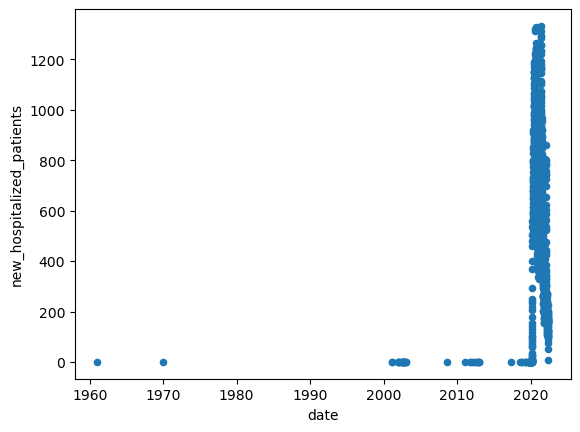

In [11]:
#Answer 4
new_df=df.loc[df['location_key'] == 'AR']
new_df
new_df.plot.scatter('date', 'new_hospitalized_patients')

Text(0, 0.5, 'new_hospitalized_patients')

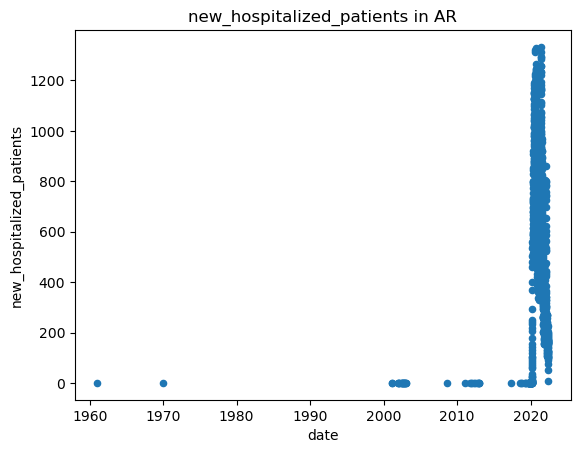

In [12]:
#Answer 5
new_df=df.loc[df['location_key'] == 'AR']
new_df.plot.scatter('date', 'new_hospitalized_patients')
plt.title('new_hospitalized_patients in AR')
plt.xlabel('date')
plt.ylabel('new_hospitalized_patients')

Text(0, 0.5, 'new_hospitalized_patients')

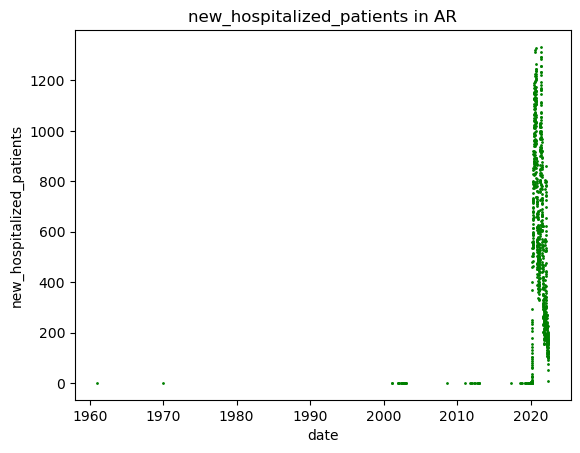

In [13]:
#Answer 6
new_df=df.loc[df['location_key'] == 'AR']
new_df.plot.scatter('date', 'new_hospitalized_patients', c="g", s= 1)
plt.title('new_hospitalized_patients in AR')
plt.xlabel('date')
plt.ylabel('new_hospitalized_patients')

Text(0, 0.5, 'new_hospitalized_patients')

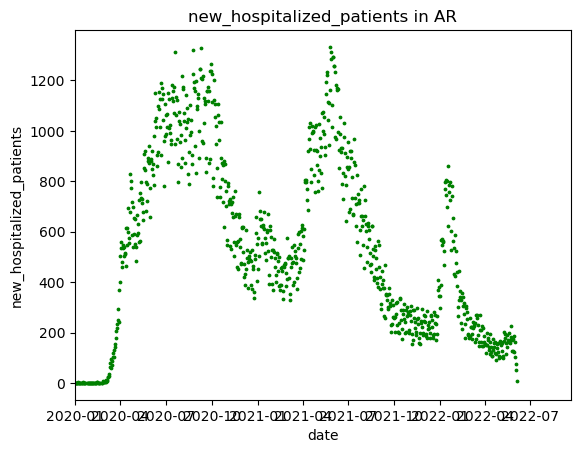

In [14]:
#Answer 7
import datetime
fig, ax = plt.subplots()
ax.scatter(new_df['date'], new_df['new_hospitalized_patients'], c='g', s=3)
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2022, 9, 20)])
plt.title('new_hospitalized_patients in AR')
plt.xlabel('date')
plt.ylabel('new_hospitalized_patients')

(array([18262., 18353., 18444., 18536., 18628., 18718., 18809., 18901.,
        18993., 19083., 19174.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

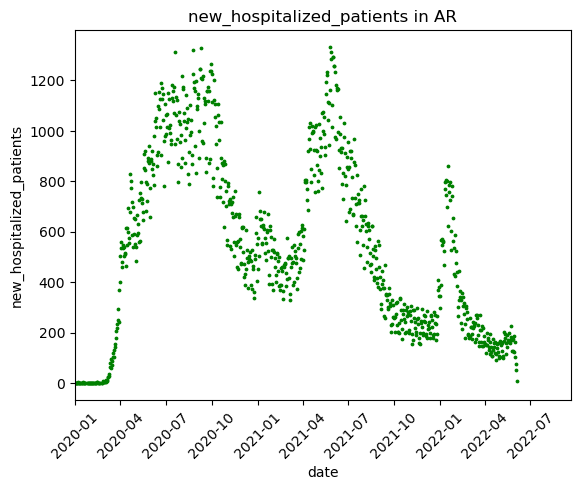

In [15]:
#Answer 8
import datetime
fig, ax = plt.subplots()
ax.scatter(new_df['date'], new_df['new_hospitalized_patients'], c='g', s=3)
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2022, 9, 20)])
plt.title('new_hospitalized_patients in AR')
plt.xlabel('date')
plt.ylabel('new_hospitalized_patients')
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='location_key'>

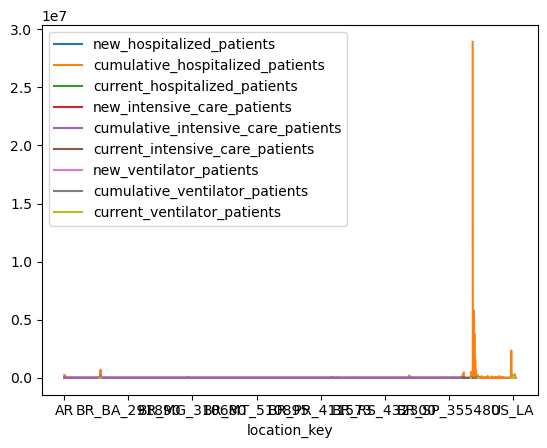

In [16]:
#Answer 9
fig, ax = plt.subplots()
df.groupby('location_key').mean().plot(ax=ax)

<AxesSubplot:xlabel='location_key'>

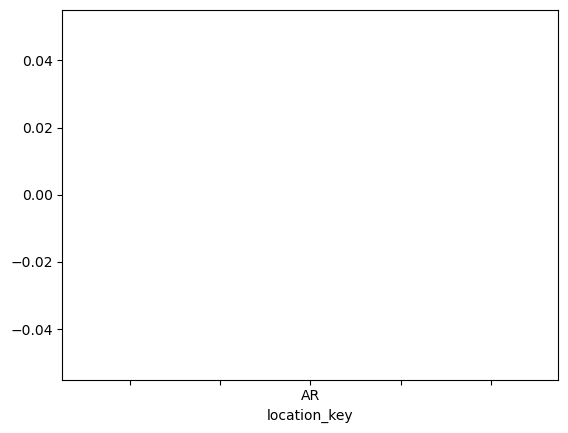

In [21]:
df2=df.loc[91:100]
fig, ax = plt.subplots()
df2.groupby('location_key')['new_intensive_care_patients'].mean().plot(ax=ax)